## Conductancia en Semimetales Topológicos de Nudo
### Nudo Anillos Enlazados (Linked Nodal Ring)
En este modelo tenemos un hamiltoniano effectivo de la aproximación de amarre fuerte que se produce con los primos relativos (2,2), donde se incluye simetría $\mathcal{PT}$ y simetría de electrón-hueco $\mathcal{\Xi}$. Primero se plantea el hamiltoniano continuo a bajas energias, el cual esta asociado con las funciones:

\begin{align}
H(\vec{k}) &= a_1\cdot \sigma_x + a_3\cdot \sigma_z\\
a_1(\vec{k}) &=k_x^2-k_y^2+k_z^2-(m-0.5k^2)^2 \quad; \quad a_3= 2k_xk_y+k_z(2m-k^2)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import kwant.continuum

import ipywidgets
from tqdm.notebook import tqdm

pi = np.pi

In [2]:
a = 1.0

Weyl_hamiltonian3D = """
    (k_x*k_x-k_y*k_y+k_z*k_z-(m-0.5*k_x*k_x-0.5*k_y*k_y-0.5*k_z*k_z)*(m-0.5*k_x*k_x-0.5*k_y*k_y-0.5*k_z*k_z) )*sigma_x 
    + ( 2*k_x*k_y+k_z*(2*m-k_x*k_x-k_y*k_y-k_z*k_z)+mz)*sigma_z
    + V(x,y,z)*sigma_0
"""

wire_template = kwant.continuum.discretize(Weyl_hamiltonian3D,grid=a)

In [3]:
# Definir bloque periodico en x(lead en direccion x)
def kwant_syst(W=20,L=20,Z=20):
    def Shape(site):
        (x, y, z) = site.pos
        return (0 <= y < W and 0 <= x < L and 0 <= z < Z)

    def lead_shape_x(site):
        (x, y, z) = site.pos
        return (0 <= y < W and 0 <= z < Z )

    syst = kwant.Builder()
    syst.fill(wire_template, Shape, (0, 0, 0))

    lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0, 0]))
    lead.fill(wire_template, lead_shape_x, (0, 0, 0))

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    syst = syst.finalized()
    return syst

In [4]:
syst = kwant_syst()
def potential(x,y,z):
    return 0*x+0*y+0*z
DATA = {"m":2.5,
           "mz":0.2,
       "V":potential}

In [5]:
# Compute conductance
def plot_conductance(E):
    global syst
    global DATA
    smatrix = kwant.smatrix(syst, E, params=DATA)
    T = smatrix.transmission(1, 0) 
    return E,T

In [6]:
k_node = [-pi, -pi/2, 0, pi/2, pi]
klabel = [ r"$-\pi$",r"$-\frac{\pi}{2}$",0,r"$\frac{\pi}{2}$",r"$\pi$"]

CPU times: user 20min 15s, sys: 10.6 s, total: 20min 26s
Wall time: 2min 34s


<Figure size 432x288 with 0 Axes>

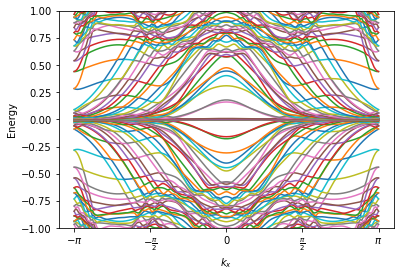

In [7]:
%%time
plt.figure()
ax = kwant.plotter.bands(syst.leads[0], params=DATA,
                    momenta=np.linspace(-pi, pi, 201),
                    show=False)
plt.ylim(-1,1)
plt.xlabel("$k_x$")
plt.xticks(k_node,klabel)
ax.savefig("2502bs_lnr_tsm_leadx_20x20.png")

In [8]:
DATA = {"m":2.5,
           "mz":0.4,
       "V":potential}

CPU times: user 20min 11s, sys: 11.5 s, total: 20min 22s
Wall time: 2min 33s


<Figure size 432x288 with 0 Axes>

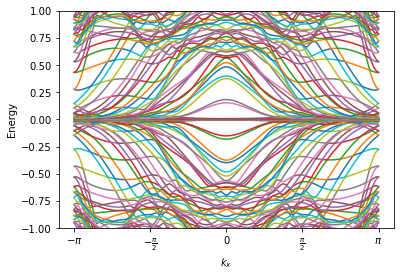

In [9]:
%%time
plt.figure()
ax = kwant.plotter.bands(syst.leads[0], params=DATA,
                    momenta=np.linspace(-pi, pi, 201),
                    show=False)
plt.ylim(-1,1)
plt.xlabel("$k_x$")
plt.xticks(k_node,klabel)
ax.savefig("2504bs_lnr_tsm_leadx_20x20.png")

In [10]:
Datos2 = np.loadtxt("Datos_25_x.txt")

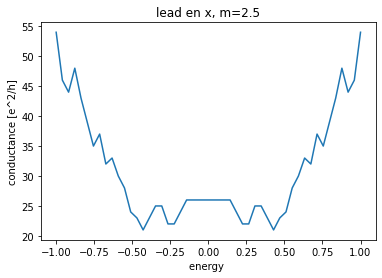

In [29]:
plt.figure()
plt.title("lead en x, m=2.5")
plt.plot(Datos2.T[0], Datos2.T[1])
plt.xlabel("energy ")
plt.ylabel("conductance [e^2/h]")
plt.savefig("25c_lnr_tsm_leadx_20x20_1.png")
plt.show()

In [12]:
Datos3 = np.loadtxt("ddatos_25_x.txt")
Energies = [ 0.0025*(i+1) for i in range(200)]

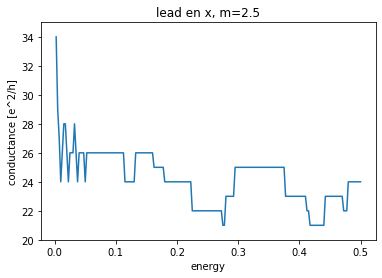

In [27]:
plt.figure()
plt.title("lead en x, m=2.5")
plt.plot(Energies, Datos3)
plt.xlabel("energy")
plt.ylabel("conductance [e^2/h]")
plt.ylim(20,35)
#plt.savefig("25c_lnr_tsm_leadx_20x20_2.png")
plt.show()

In [14]:
#syst = kwant_syst( 30, 30, 30)

In [15]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("25bs_lnr_tsm_leadx_30x30.png")

In [16]:
#DATA = {"m":2.5,
#           "mz":0.2,
#       "V":potential}

In [17]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("2502bs_lnr_tsm_leadx_30x30.png")

In [18]:
#DATA = {"m":2.5,
#           "mz":0.4,
#       "V":potential}

In [19]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("2504bs_lnr_tsm_leadx_30x30.png")

In [20]:
#DATA = {"m":1.5,
#           "mz":0,
#       "V":potential}

In [21]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("15bs_lnr_tsm_leadx_30x30.png")

In [22]:
#DATA = {"m":1.5,
#           "mz":0.2,
#       "V":potential}

In [23]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("1502bs_lnr_tsm_leadx_30x30.png")

In [24]:
#DATA = {"m":1.5,
#           "mz":0.4,
#       "V":potential}

In [25]:
#%%time
#plt.figure()
#ax = kwant.plotter.bands(syst.leads[0], params=DATA,
#                    momenta=np.linspace(-pi, pi, 201),
#                    show=False)
#plt.ylim(-1,1)
#plt.xlabel("$k_x$")
#plt.xticks(k_node,klabel)
#ax.savefig("1504bs_lnr_tsm_leadx_30x30.png")